In [1]:
import matplotlib.pyplot as plot
# from demo import *
import pandas as pd
# from ilp import ilp
from sample import *

In [2]:
df=pd.read_csv('/users/yiwei/data/Data/000/Trajectory/20081023025304.plt',sep=',',names=['Latitude','Longitude','0','1','2','3','4'],skiprows=6)

In [3]:
point_set=np.array(df.loc[:29,['Longitude','Latitude']].values.tolist())
prox=proximity(point_set,set_eps=True)
sample_size=10

In [9]:
prox.epsilon

3.2147064340016937e-07

In [4]:
def get_obj(samples,size):
    obj=0
    for i in range(size-1):
        for j in range(i+1,size):
            obj+=prox.run(samples[i],samples[j])    
            # obj+=proximity(samples[i],samples[j])
    return np.around(obj,2)

In [6]:
point_set.shape

(30, 2)

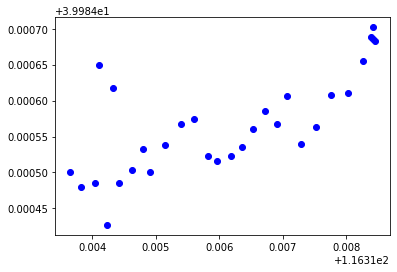

In [6]:
x=point_set[:,0]
y=point_set[:,1]
plot.scatter(x,y,c='b')

In [4]:
ilp_generator=ilp(prox)
ilp_sample=ilp_generator.run(point_set,[10])
# print(get_loss(ilp_sample[0],8))
# print(get_loss(ilp_sample[0],10))


optimal


TypeError: list indices must be integers or slices, not tuple

In [12]:
np.save(file='ilp_30.npy',arr=ilp_sample)

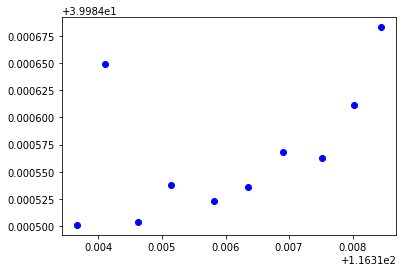

In [5]:
ilp_x=ilp_sample[0][:,0]
ilp_y=ilp_sample[0][:,1]
plot.scatter(ilp_x,ilp_y,c='b')

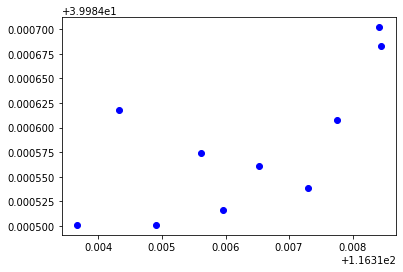

In [7]:
int_generator=interchange(prox)
int_samples=int_generator.run(point_set,sample_size)
# print(get_obj(int_samples,sample_size))
int_x=int_samples[:,0]
int_y=int_samples[:,1]
plot.scatter(int_x,int_y,c='b')

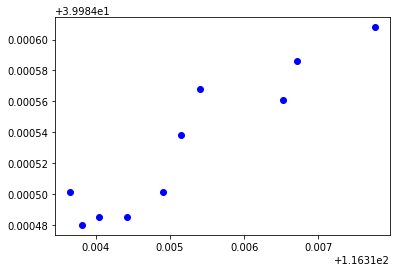

In [8]:
rd_sample=ReservoirSample(point_set,sample_size)
# print(get_obj(rd_sample,sample_size))
rd_x=rd_sample[:,0]
rd_y=rd_sample[:,1]
plot.scatter(rd_x,rd_y,c='b')

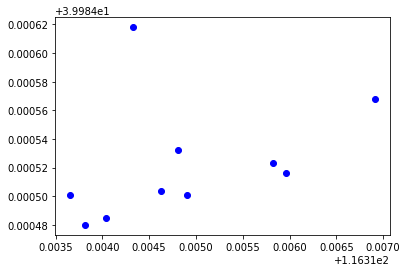

In [9]:
st_sample=Stratified_sampling(point_set,sample_size,5)
# print(get_obj(st_sample,sample_size))
st_x=st_sample[:,0]
st_y=st_sample[:,1]
plot.scatter(st_x,st_y,c='b')

In [5]:
ilp_samples=ilp(point_set,3)
print(get_loss(ilp_samples,3))
# ilp_x=ilp_samples[:,0]
# ilp_y=ilp_samples[:,1]
# plot.scatter(ilp_x,ilp_y,c='b')

11 55
optimal
0.3301709058221377


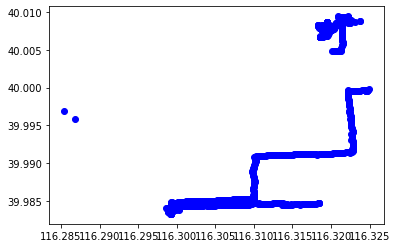

In [10]:
x=df.loc[:,['Longitude']].values.tolist()
y=df.loc[:,['Latitude']].values.tolist()
plot.scatter(x,y,c='b')

In [7]:
int_samples=interchange(point_set,3)
print(get_loss(int_samples,3))
# int_x=samples[:,0]
# int_y=samples[:,1]
# plot.scatter(int_x,int_y,c='b')

0.3301709058221377


In [8]:
rd_sample=ReservoirSample(point_set,3)
print(get_loss(rd_sample,3))

# rd_x=rd_sample[:,0]
# rd_y=rd_sample[:,1]
# plot.scatter(rd_x,rd_y,c='b')


2.091878246367592


In [9]:
st_sample=Stratified_sampling(point_set,3,5)
print(get_loss(st_sample,3))
# st_x=st_sample[:,0]
# st_y=st_sample[:,1]
# plot.scatter(st_x,st_y,c='b')


IndexError: index 2 is out of bounds for axis 0 with size 2